### Plan d'analyse :
Objectif : questionner la rigueur statistique de l'indice de vulnérabilité utilisé dans les schémas de protection de l'enfance
Méthode : isoler les indicateurs sur un département donné et étudier les relations entre variables
Indicateurs à étudier : 
-  Nombre de jeunes de moins de 20 ans
- Taux de jeunes dans la population
- Niveaux de revenus ou taux de pauvreté
- nombre de familles monoparentales
- nombre de familles nombreuses
- Indicateurs de logement : taille des logements, logements insalubres ?

Dans un 2ème temps, essayer de trouver une relation entre nb de placements et indicateurs de vulnérabilité

Sources :
- Indicateur de vulnérabilité calculé dans le cadre du schéma départemental du CD13 pour le cabinet Néorizons
- Données RBPP INSEE 2020

### NExt step 
- Choisir la définition ménages ou familles
- Constituer la base cible avec pop, nb jeunes, taux jeunes, familles mono
- ajouter indicateurs Taux pauvreté = comment traiter les vides ?

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# 1. Préparation des données
Objectif : récupérer les champs nécessaires dans une base csv à exporter pour travailler à partir d'un fichier propre
Filtré sur le CD13 
- Nombre de jeunes de moins de 20 ans => champ existant dans ?
- Taux de jeunes dans la population => champ calculé à partir du total de population et du champ précédent
- Niveaux de revenus ou taux de pauvreté => champ existant dans la base Filosofi. Valeurs manquantes à
- nombre de familles monoparentales
- nombre de familles nombreuses
- Indicateurs de logement : taille des logements, logements insalubres ?


### Import de la base cc evol struct pop

In [3]:
#Chargement du dataset
df_evolpop = pd.read_excel(r"C:\Users\thiba\Documents\Projets data\2023_indicateur INSEE\Bases_données_INSEE\base-cc-evol-struct-pop-2020.xlsx", sheet_name = "COM_2020")

In [4]:
df_evolpop1 = df_evolpop
df_evolpop1.head(5)

,Chiffres détaillés - Évolution et structure de la population,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107
0,France hors Mayotte - Communes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mise en ligne le 27/06/2023 Géographie a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"©Insee Source(s) : Insee, Recensements d...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Code géographique,Région,Département,Libellé géographique,Population en 2020 (princ),Pop 0-14 ans en 2020 (princ),Pop 15-29 ans en 2020 (princ),Pop 30-44 ans en 2020 (princ),Pop 45-59 ans en 2020 (princ),Pop 60-74 ans en 2020 (princ),...,Pop 25-54 ans Autres en 2020 (compl),Pop 55 ans ou plus en 2020 (compl),Pop 55 ans ou plus Agriculteurs exploitants en...,"Pop 55 ans ou plus Artisans, Comm., Chefs entr...","Pop 55 ans ou plus Cadres, Prof. intel. sup. e...",Pop 55 ans ou plus Prof. intermédiaires en 202...,Pop 55 ans ou plus Employés en 2020 (compl),Pop 55 ans ou plus Ouvriers en 2020 (compl),Pop 55 ans ou plus Retraités en 2020 (compl),Pop 55 ans ou plus Autres en 2020 (compl)
4,CODGEO,REG,DEP,LIBGEO,P20_POP,P20_POP0014,P20_POP1529,P20_POP3044,P20_POP4559,P20_POP6074,...,C20_POP2554_CS8,C20_POP55P,C20_POP55P_CS1,C20_POP55P_CS2,C20_POP55P_CS3,C20_POP55P_CS4,C20_POP55P_CS5,C20_POP55P_CS6,C20_POP55P_CS7,C20_POP55P_CS8


In [5]:
noms_champs = dict(zip(df_evolpop1.loc[4], df_evolpop1.loc[3]))
print(noms_champs)

{'CODGEO': 'Code géographique', 'REG': 'Région', 'DEP': 'Département', 'LIBGEO': 'Libellé géographique', 'P20_POP': 'Population en 2020 (princ)', 'P20_POP0014': 'Pop 0-14 ans en 2020 (princ)', 'P20_POP1529': 'Pop 15-29 ans en 2020 (princ)', 'P20_POP3044': 'Pop 30-44 ans en 2020 (princ)', 'P20_POP4559': 'Pop 45-59 ans en 2020 (princ)', 'P20_POP6074': 'Pop 60-74 ans en 2020 (princ)', 'P20_POP7589': 'Pop 75-89 ans en 2020 (princ)', 'P20_POP90P': 'Pop 90 ans ou plus en 2020 (princ)', 'P20_POPH': 'Pop Hommes en 2020 (princ)', 'P20_H0014': 'Pop Hommes 0-14 ans en 2020 (princ)', 'P20_H1529': 'Pop Hommes 15-29 ans en 2020 (princ)', 'P20_H3044': 'Pop Hommes 30-44 ans en 2020 (princ)', 'P20_H4559': 'Pop Hommes 45-59 ans en 2020 (princ)', 'P20_H6074': 'Pop Hommes 60-74 ans en 2020 (princ)', 'P20_H7589': 'Pop Hommes 75-89 ans en 2020 (princ)', 'P20_H90P': 'Pop Hommes 90 ans ou plus en 2020 (princ)', 'P20_H0019': 'Pop Hommes 0-19 ans en 2020  (princ)', 'P20_H2064': 'Pop Hommes 20-64 ans en 2020 (pr

In [6]:
#On renomme les colonnes avec les vrais noms des champs INSEE
df_evolpop1.columns = df_evolpop.iloc[4]
#On supprime les lignes en trop
df_evolpop1 = df_evolpop1.drop([0, 1, 2, 3, 4], axis = 0)
df_evolpop1 = df_evolpop1.reset_index()

In [7]:
df_evolpop1.head()
df_evolpop1 = df_evolpop1.drop(["index"], axis = 1)
df_evolpop1.head()

4,CODGEO,REG,DEP,LIBGEO,P20_POP,P20_POP0014,P20_POP1529,P20_POP3044,P20_POP4559,P20_POP6074,...,C20_POP2554_CS8,C20_POP55P,C20_POP55P_CS1,C20_POP55P_CS2,C20_POP55P_CS3,C20_POP55P_CS4,C20_POP55P_CS5,C20_POP55P_CS6,C20_POP55P_CS7,C20_POP55P_CS8
0,01001,84,01,L'Abergement-Clémenciat,806,155.30615,97.16938,148.761022,191.372049,143.616249,...,9.386058,280.983168,4.692272,18.603513,18.603513,13.826181,9.300999,22.961578,183.694113,9.300999
1,01002,84,01,L'Abergement-de-Varey,262,57.242248,33.095709,56.756395,56.376187,38.18473,...,0,87.696424,0,0,8.715094,8.442353,0,4.493918,61.551141,4.493918
2,01004,84,01,Ambérieu-en-Bugey,14288,2649.807321,3027.79416,2691.337871,2427.065245,2169.6347,...,564.147194,4270.361746,4.42397,90.430569,105.684499,258.15207,287.364692,268.398693,2910.656689,345.250563
3,01005,84,01,Ambérieux-en-Dombes,1782,353,273,369,387,277,...,20,515,0,35,25,50,25,10,345,25
4,01006,84,01,Ambléon,113,9.912281,13.877193,19.824561,23.789474,37.666667,...,4.95614,24.780702,0,0,0,4.95614,0,0,19.824561,0


In [8]:
#Infos du dataset : nombre de colonnes, stats
df_evolpop1.info()
#df_evolpop1.columns[4:108]
#df_evolpop1.columns[4:108] = df_evolpop1.columns[4:108].astype("float")
#df_evolpop1.iloc[:,4:108] = df_evolpop1.iloc[:,4:108].apply(pd.to_numeric)
df_evolpop1[df_evolpop1.columns[4:108]] = df_evolpop1[df_evolpop1.columns[4:108]].astype("float")
df_evolpop1.dtypes
#Learning : ILOC ne permet pas de changer les types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34928 entries, 0 to 34927
Columns: 108 entries, CODGEO to C20_POP55P_CS8
dtypes: object(108)
memory usage: 28.8+ MB


4
CODGEO             object
REG                object
DEP                object
LIBGEO             object
P20_POP           float64
                   ...   
C20_POP55P_CS4    float64
C20_POP55P_CS5    float64
C20_POP55P_CS6    float64
C20_POP55P_CS7    float64
C20_POP55P_CS8    float64
Length: 108, dtype: object

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 4289 to 4407
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CODGEO   119 non-null    object 
 1   REG      119 non-null    object 
 2   DEP      119 non-null    object 
 3   LIBGEO   119 non-null    object 
 4   P20_POP  119 non-null    float64
dtypes: float64(1), object(4)
memory usage: 5.6+ KB
None


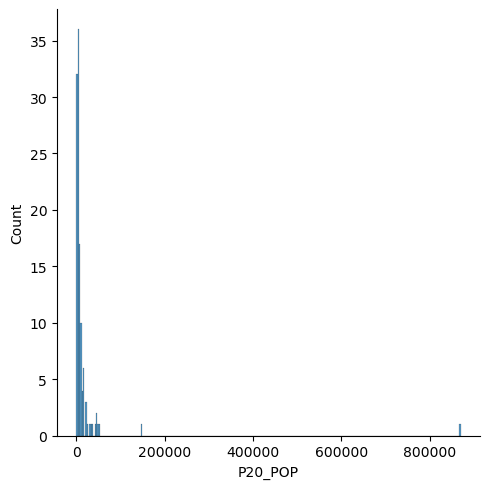

In [12]:
#Extraction des données CD13, colonne POP20
df_pop_13 = df_evolpop1[df_evolpop1["DEP"] == "13"]
df_pop_13 = df_pop_13[["CODGEO","REG","DEP","LIBGEO","P20_POP"]]
print(df_pop_13.info())
sns.displot(df_pop_13, x = "P20_POP", kind = "hist")
plt.show()

### Import de la base cc familles ménages 2020

In [14]:
#Chargement du dataset
df_fammg = pd.read_excel(r"C:\Users\thiba\Documents\Projets data\2023_indicateur INSEE\Bases_données_INSEE\base-cc-coupl-fam-men-2020.xlsx", sheet_name = "COM_2020")

In [15]:
df_fammg.head(5)

,Chiffres détaillés - Couples - Familles - Ménages,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83
0,France hors Mayotte - Communes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mise en ligne le 27/06/2023 Géographie a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"©Insee Source(s) : Insee, Recensements d...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Code géographique,Région,Département,Libellé géographique,Ménages en 2020 (compl),Ménages 1 personne en 2020 (compl),Ménages Hommes seuls en 2020 (compl),Ménages Femmes seules en 2020 (compl),Ménages Autres sans famille en 2020 (compl),Ménages avec famille(s) en 2020 (compl),...,Fam Couple avec enfant(s) en 2020 (compl),Fam Monoparentales en 2020 (compl),Fam Mono Hommes avec enfant(s) en 2020 (compl),Fam Mono Femmes avec enfant(s) en 2020 (compl),Fam Couple sans enfant en 2020 (compl),Fam 0 enfant moins 25 ans en 2020 (compl),Fam 1 enfant moins 25 ans en 2020 (compl),Fam 2 enfants moins 25 ans en 2020 (compl),Fam 3 enfants moins 25 ans en 2020 (compl),Fam 4 enfants ou plus moins 25 ans en 2020 (co...
4,CODGEO,REG,DEP,LIBGEO,C20_MEN,C20_MENPSEUL,C20_MENHSEUL,C20_MENFSEUL,C20_MENSFAM,C20_MENFAM,...,C20_COUPAENF,C20_FAMMONO,C20_HMONO,C20_FMONO,C20_COUPSENF,C20_NE24F0,C20_NE24F1,C20_NE24F2,C20_NE24F3,C20_NE24F4P


In [16]:
noms_champs = dict(zip(df_fammg.loc[4], df_fammg.loc[3]))
print(noms_champs)

{'CODGEO': 'Code géographique', 'REG': 'Région', 'DEP': 'Département', 'LIBGEO': 'Libellé géographique', 'C20_MEN': 'Ménages en 2020 (compl)', 'C20_MENPSEUL': 'Ménages 1 personne en 2020 (compl)', 'C20_MENHSEUL': 'Ménages Hommes seuls en 2020 (compl)', 'C20_MENFSEUL': 'Ménages Femmes seules en 2020 (compl)', 'C20_MENSFAM': 'Ménages Autres sans famille en 2020 (compl)', 'C20_MENFAM': 'Ménages avec famille(s) en 2020 (compl)', 'C20_MENCOUPSENF': 'Mén fam princ Couple sans enfant en 2020 (compl)', 'C20_MENCOUPAENF': 'Mén fam princ Couple avec enfant(s) en 2020 (compl)', 'C20_MENFAMMONO': 'Mén fam princ Famille mono en 2020 (compl)', 'C20_PMEN': 'Pop Ménages en 2020 (compl)', 'C20_PMEN_MENPSEUL': 'Pop mén Personnes seules en 2020 (compl)', 'C20_PMEN_MENHSEUL': 'Pop mén Hommes seuls en 2020 (compl)', 'C20_PMEN_MENFSEUL': 'Pop mén Femmes seules en 2020 (compl)', 'C20_PMEN_MENSFAM': 'Pop mén Autres sans famille en 2020 (compl)', 'C20_PMEN_MENFAM': 'Pop mén avec famille(s) en 2020 (compl)', 'C

In [17]:
#On renomme les colonnes avec les vrais noms des champs INSEE
df_fammg.columns = df_fammg.iloc[4]
#On supprime les lignes en trop
df_fammg = df_fammg.drop([0, 1, 2, 3, 4], axis = 0)
df_fammg = df_fammg.reset_index()

In [18]:
df_fammg = df_fammg.drop(["index"], axis = 1)
df_fammg.head()

4,CODGEO,REG,DEP,LIBGEO,C20_MEN,C20_MENPSEUL,C20_MENHSEUL,C20_MENFSEUL,C20_MENSFAM,C20_MENFAM,...,C20_COUPAENF,C20_FAMMONO,C20_HMONO,C20_FMONO,C20_COUPSENF,C20_NE24F0,C20_NE24F1,C20_NE24F2,C20_NE24F3,C20_NE24F4P
0,01001,84,01,L'Abergement-Clémenciat,334.478609,67.900046,40.740028,27.160019,9.217454,257.361108,...,123.624477,23.12718,9.300999,13.826181,110.609451,124.519177,65.609777,47.688253,14.591798,4.952104
1,01002,84,01,L'Abergement-de-Varey,110.160087,33.769413,25.32706,8.442353,0,76.390674,...,40.14897,4.784281,0,4.784281,31.457423,31.457423,14.352843,25.157904,5.422504,0
2,01004,84,01,Ambérieu-en-Bugey,6771.267247,2987.246214,1298.741067,1688.505147,79.985522,3704.035511,...,1432.85575,673.065468,134.878695,538.186773,1627.23715,1776.78419,858.173672,672.098435,319.564059,106.538013
3,01005,84,01,Ambérieux-en-Dombes,740,185,65,120,25,530,...,275,35,15,20,220,255,120,115,35,5
4,01006,84,01,Ambléon,54.517544,14.868421,14.868421,0,0,39.649123,...,9.912281,9.912281,0,9.912281,19.824561,19.824561,19.824561,0,0,0


In [19]:
#Infos du dataset : nombre de colonnes, stats
df_fammg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34928 entries, 0 to 34927
Data columns (total 84 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   CODGEO                         34928 non-null  object
 1   REG                            34928 non-null  object
 2   DEP                            34928 non-null  object
 3   LIBGEO                         34928 non-null  object
 4   C20_MEN                        34928 non-null  object
 5   C20_MENPSEUL                   34928 non-null  object
 6   C20_MENHSEUL                   34928 non-null  object
 7   C20_MENFSEUL                   34928 non-null  object
 8   C20_MENSFAM                    34928 non-null  object
 9   C20_MENFAM                     34928 non-null  object
 10  C20_MENCOUPSENF                34928 non-null  object
 11  C20_MENCOUPAENF                34928 non-null  object
 12  C20_MENFAMMONO                 34928 non-null  object
 13  C

In [20]:
df_fammg[df_fammg.columns[4:]] = df_fammg[df_fammg.columns[4:]].astype("float")
df_fammg.dtypes
#Learning : ILOC ne permet pas de changer les types

4
CODGEO          object
REG             object
DEP             object
LIBGEO          object
C20_MEN        float64
                ...   
C20_NE24F0     float64
C20_NE24F1     float64
C20_NE24F2     float64
C20_NE24F3     float64
C20_NE24F4P    float64
Length: 84, dtype: object

On garde : 
'C20_MEN': 'Ménages en 2020 (compl)'
'C20_MENFAM': 'Ménages avec famille(s) en 2020 (compl)'
'C20_MENCOUPAENF': 'Mén fam princ Couple avec enfant(s) en 2020 (compl)'
'C20_MENFAMMONO': 'Mén fam princ Famille mono en 2020 (compl)'
'C20_PMEN': 'Pop Ménages en 2020 (compl)'
'C20_PMEN_MENFAMMONO': 'Pop mén fam princ Famille mono en 2020 (compl)'
'P20_POP15P': 'Pop 15 ans ou plus en 2020 (princ)'
'P20_POP1519': 'Pop 15-19 ans en 2020 (princ)'
'P20_POP2024': 'Pop 20-24 ans en 2020 (princ)'
'P20_POP2539': 'Pop 25-39 ans en 2020 (princ)'
'P20_POP4054': 'Pop 40-54 ans en 2020 (princ)'
'P20_POP5564': 'Pop 55-64 ans en 2020 (princ)'
'P20_POP6579': 'Pop 65-79 ans en 2020 (princ)'
'P20_POP80P': 'Pop 80 ans ou plus en 2020 (princ)'
'C20_FAM': 'Familles en 2020 (compl)',
'C20_COUPAENF': 'Fam Couple avec enfant(s) en 2020 (compl)'
'C20_FAMMONO': 'Fam Monoparentales en 2020 (compl)'
'C20_NE24F3': 'Fam 3 enfants moins 25 ans en 2020 (compl)'
'C20_NE24F4P': 'Fam 4 enfants ou plus moins 25 ans en 2020 (compl)'}

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 4289 to 4407
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CODGEO               119 non-null    object 
 1   REG                  119 non-null    object 
 2   DEP                  119 non-null    object 
 3   LIBGEO               119 non-null    object 
 4   C20_MEN              119 non-null    float64
 5   C20_MENFAM           119 non-null    float64
 6   C20_MENCOUPAENF      119 non-null    float64
 7   C20_MENFAMMONO       119 non-null    float64
 8   C20_PMEN             119 non-null    float64
 9   C20_PMEN_MENFAMMONO  119 non-null    float64
 10  P20_POP15P           119 non-null    float64
 11  P20_POP1519          119 non-null    float64
 12  P20_POP2024          119 non-null    float64
 13  P20_POP2539          119 non-null    float64
 14  P20_POP4054          119 non-null    float64
 15  P20_POP5564          119 non-null   

4,CODGEO,REG,DEP,LIBGEO,C20_MEN,C20_MENFAM,C20_MENCOUPAENF,C20_MENFAMMONO,C20_PMEN,C20_PMEN_MENFAMMONO,...,P20_POP2539,P20_POP4054,P20_POP5564,P20_POP6579,P20_POP80P,C20_FAM,C20_COUPAENF,C20_FAMMONO,C20_NE24F3,C20_NE24F4P
4289,13001,93,13,Aix-en-Provence,73887.317689,35135.673950,12819.699292,6431.023214,138679.459335,16228.850164,...,30396.673598,25555.061197,16117.627469,18991.862591,9066.058311,35440.273030,12874.701733,6555.542576,1847.287097,501.091796
4290,13002,93,13,Allauch,8810.566521,6493.599618,2855.139489,837.137983,21121.763789,2137.448060,...,3287.949014,4278.166884,3285.555320,3503.776688,1501.786098,6594.665123,2857.863168,903.748958,280.520078,44.790243
4291,13003,93,13,Alleins,1139.162837,819.275770,380.100168,110.435745,2687.331047,268.077247,...,477.637041,572.965866,383.778805,376.318056,108.760455,823.946604,380.100168,115.106579,41.467313,9.018684
4292,13004,93,13,Arles,23595.716931,13882.371994,5164.588724,2564.660072,49494.793488,6491.391576,...,8127.446979,9716.063927,7345.078655,8688.852477,3549.529071,14011.391390,5185.532457,2615.680969,963.895688,309.653527
4293,13005,93,13,Aubagne,20411.387155,12926.543075,5318.922816,2863.080699,45492.995487,7281.438738,...,7807.517564,9679.754744,5667.002889,7077.620553,3237.663900,13121.044275,5346.680546,2941.335268,859.517752,216.177285


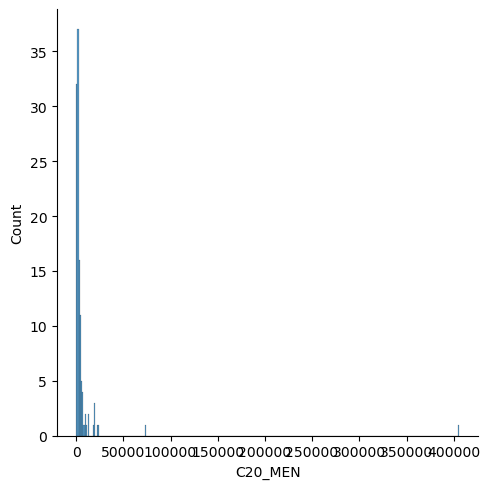

In [44]:
#Extraction des données CD13, colonne POP20
#On garde : 

df_fammg_13 = df_fammg[df_fammg["DEP"] == "13"]
df_fammg_13 = df_fammg_13[["CODGEO","REG","DEP","LIBGEO","C20_MEN",'C20_MENFAM',
                           'C20_MENCOUPAENF','C20_MENFAMMONO', 'C20_PMEN',
                           'C20_PMEN_MENFAMMONO','P20_POP15P','P20_POP1519',
                           'P20_POP2024','P20_POP2539','P20_POP4054','P20_POP5564','P20_POP6579', 'P20_POP80P', 'C20_FAM', 'C20_COUPAENF','C20_FAMMONO','C20_NE24F3','C20_NE24F4P']]
print(df_fammg_13.info())
sns.displot(df_fammg_13, x = "C20_MEN", kind = "hist")
#plt.show()
df_fammg_13.head()


###C'est quoi définition famille vs ménage ? on prend la pop ou les ménages ?

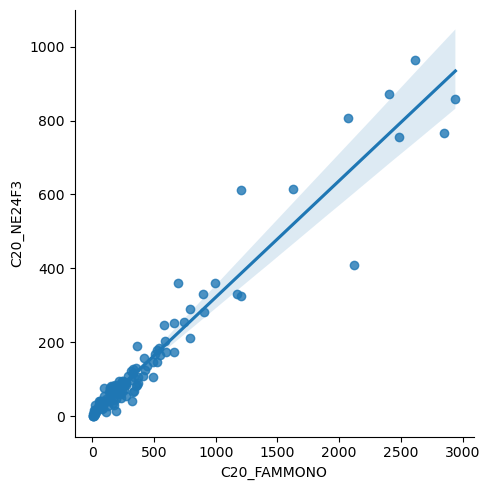

In [35]:
sns.lmplot(df_fammg_13[df_fammg_13["C20_FAMMONO"] < 5000], x = "C20_FAMMONO", y = "C20_NE24F3")

In [45]:
df_fammg_13 = df_fammg_13[df_fammg_13["C20_MEN"] < 50000]

<Axes: xlabel='4', ylabel='4'>

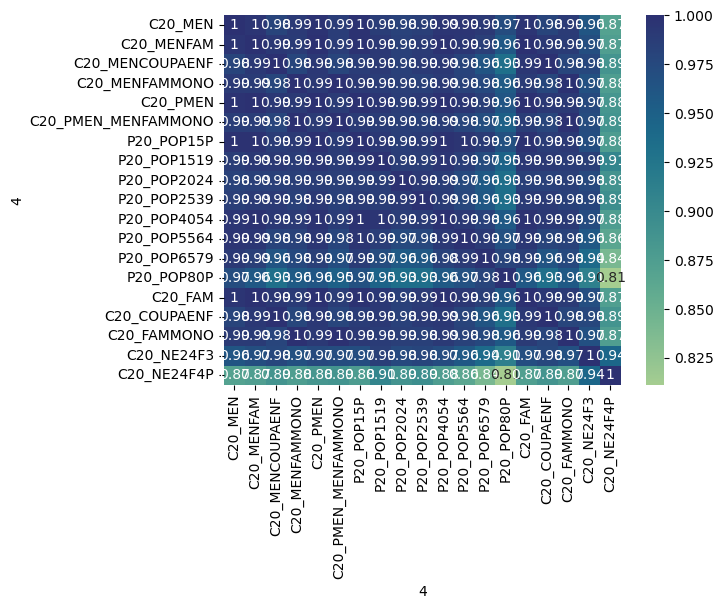

In [46]:
sns.heatmap(df_fammg_13[df_fammg_13.columns[4:]].corr(), cmap = "crest", annot = True)

# 2. Exploration des données

In [9]:
#Maintenant que le df est prêt, premières explorations
df_reduit = df_evolpop1[["CODGEO","REG","DEP","LIBGEO","P20_POP","P20_POP0014","P20_POP1529","C20_POP15P_CS1","C20_POP15P_CS2","C20_POP15P_CS3","C20_POP15P_CS4","C20_POP15P_CS5","C20_POP15P_CS6","C20_POP15P_CS7", "C20_POP15P_CS8"]]
df = df_reduit[df_evolpop1["DEP"] == "13"]
# On enlève Marseille
i = df.loc[df["CODGEO"] == "13055"].index
i
df = df.drop(index = i)
df.loc[df["CODGEO"] == "13055"]

4,CODGEO,REG,DEP,LIBGEO,P20_POP,P20_POP0014,P20_POP1529,C20_POP15P_CS1,C20_POP15P_CS2,C20_POP15P_CS3,C20_POP15P_CS4,C20_POP15P_CS5,C20_POP15P_CS6,C20_POP15P_CS7,C20_POP15P_CS8


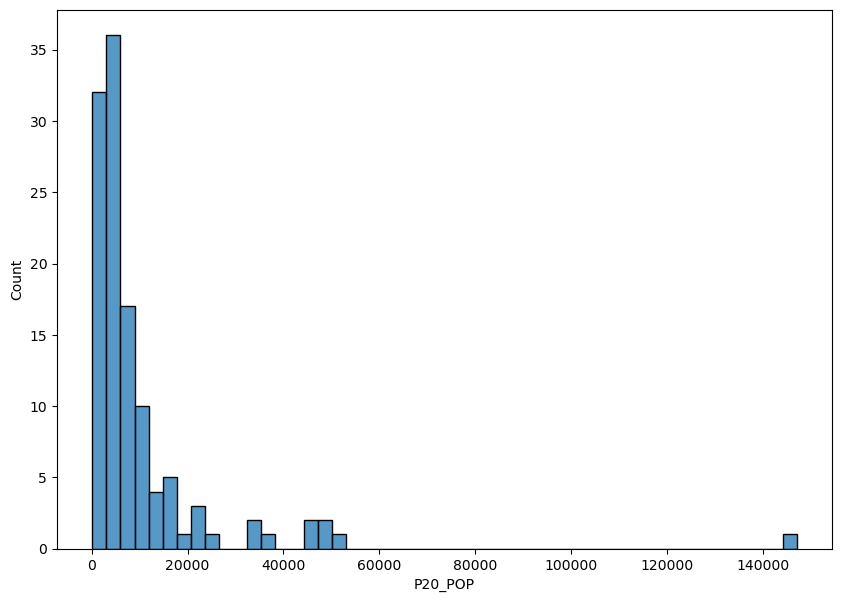

In [10]:
#distribution de la variable population en 2020
df.describe()
plt.figure(figsize = (10,7))
sns.histplot(x = "P20_POP", data = df)
plt.show()

In [11]:
df["CODGEO"].loc[(df.P20_POP == df.P20_POP.max())]

4289    13001
Name: CODGEO, dtype: object

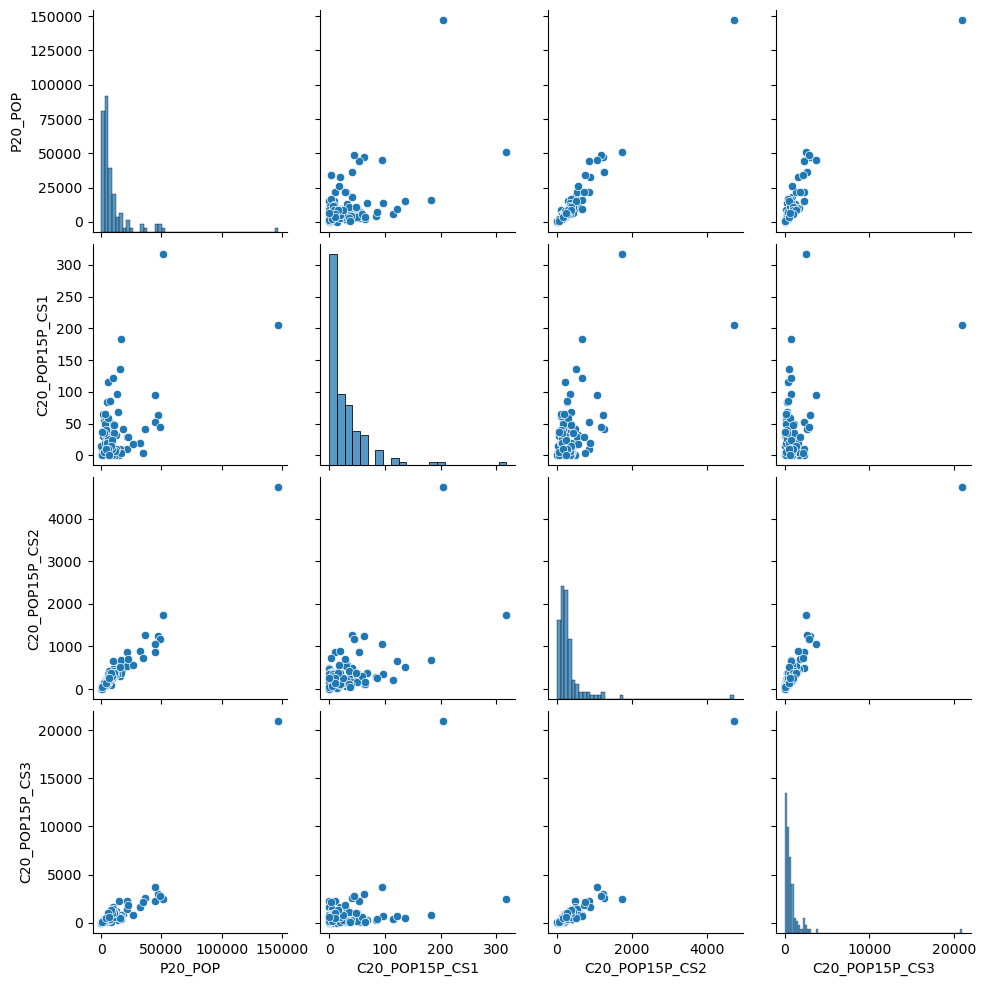

In [12]:
sns.pairplot(data = df[["P20_POP", "C20_POP15P_CS1","C20_POP15P_CS2","C20_POP15P_CS3"]])

In [161]:
print(df.dtypes)
df_num = df.select_dtypes(include = ["int", "float"])
df_num = df_num.rename(noms_champs, axis = 1)
print(df_num.info())


4
CODGEO             object
REG                object
DEP                object
LIBGEO             object
P20_POP           float64
P20_POP0014       float64
P20_POP1529       float64
C20_POP15P_CS1    float64
C20_POP15P_CS2    float64
C20_POP15P_CS3    float64
C20_POP15P_CS4    float64
C20_POP15P_CS5    float64
C20_POP15P_CS6    float64
C20_POP15P_CS7    float64
C20_POP15P_CS8    float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 4289 to 4407
Data columns (total 11 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Population en 2020 (princ)                                       118 non-null    float64
 1   Pop 0-14 ans en 2020 (princ)                                     118 non-null    float64
 2   Pop 15-29 ans en 2020 (princ)                                    118 non-null    float64
 3   Pop 15 ans

<Axes: xlabel='4', ylabel='4'>

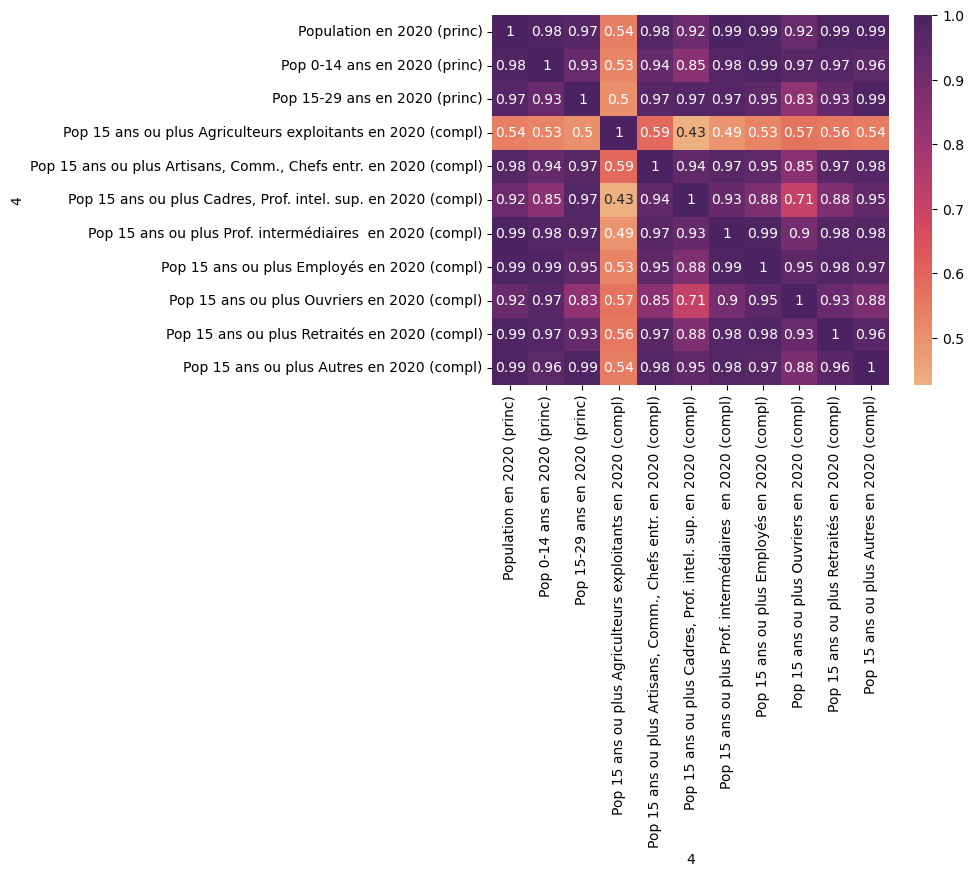

In [162]:
coeff_corr = df_num.corr()
sns.heatmap(coeff_corr, annot = True, cmap = "flare")